<a href="https://colab.research.google.com/github/Oreolorun/NeuralNetsPractice/blob/main/Convolutional_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#  unzipping dataset
!unzip gdrive/My\ Drive/Datasets/kagglecatsanddogs_3367a.zip > /dev/null

In [110]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import torch

In [ ]:
dic = {'a':0, 'b':1}

for k, v in dic.items():
  print(f'{k}:{v}')

a:0
b:1


In [ ]:
os.path.join()

In [ ]:
#  define class to build data
REBUILD_DATA=False

class DogsVSCats():
  def __init__(self):
    self.IMG_SIZE = 50
    self.CATS = 'PetImages/Cat'
    self.DOGS = 'PetImages/Dog'
    self.LABELS = {self.CATS: 0, self.DOGS: 1}
    self.training_data = []
    self.catcount = 0
    self.dogcount = 0

  def make_training_data(self):
    for label in self.LABELS:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          if label == self.CATS:
            self.catcount+=1
          elif label == self.DOGS:
            self.dogcount+=1
        except Exception as e:
          pass

    np.random.shuffle(self.training_data)
    np.save('training_data.npy', self.training_data)
    print('Cats:', self.catcount)
    print('Dogs:', self.dogcount)

if REBUILD_DATA:
  dogsvcats = DogsVSCats()
  dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:22<00:00, 548.55it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:17<00:00, 716.29it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [ ]:
training_data = np.load('training_data.npy', allow_pickle=True)

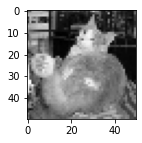

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(training_data[9576][0], cmap='gray')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    x = torch.randn(50,50).view(-1,1,50,50)
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)

  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

    print(x[0].shape)
    if self._to_linear is None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
    return x

  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)

net = Net()

torch.Size([128, 2, 2])


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

X = torch.tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.tensor([i[1] for i in training_data])

val_pct = 0.1
val_size = int(len(X))*val_pct
val_size = int(val_size)
val_size

2494

In [ ]:
X_train = X[:-val_size]
y_train = y[:-val_size]

X_test = X[-val_size:]
y_test = y[-val_size:]

print(len(X_test))
print(len(X_train))

2494
22452


In [ ]:
range(1)

range(0, 1)

In [ ]:
batch_size = 100
epochs = 1

for epoch in range(epochs):
  for i in tqdm_notebook(range(0, len(X_train), batch_size)):
    batch_x = X_train[i:i+batch_size].view(-1, 1, 50, 50)
    batch_y = y_train[i:i+batch_size]

    net.zero_grad()
    outputs = net(batch_x)
    loss = loss_fn(outputs.float(), batch_y.float())
    loss.backward()
    optimizer.step()

print(loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

In [ ]:
correct = 0
total = 0
with torch.np_grad():
  for i in tqdm_notebook(range(len(X_test))):
    real_class = torch.argmax(test_y[i])
    net_out = net(test)

In [68]:
dog_imgs = []
parent_dir = 'PetImages/Dog'

for file in tqdm(os.listdir(parent_dir)):
  path = os.path.join(parent_dir, file)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  dog_imgs.append(img)

100%|██████████| 12501/12501 [00:28<00:00, 435.14it/s]


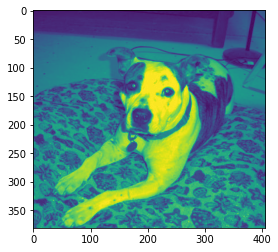

In [74]:
sample = dog_imgs[48]
plt.imshow(sample)

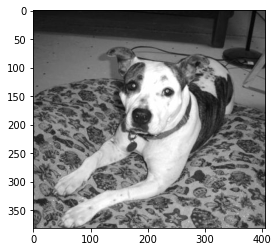

In [75]:
ex1 = sample.copy()
plt.imshow(ex1, cmap='gray')

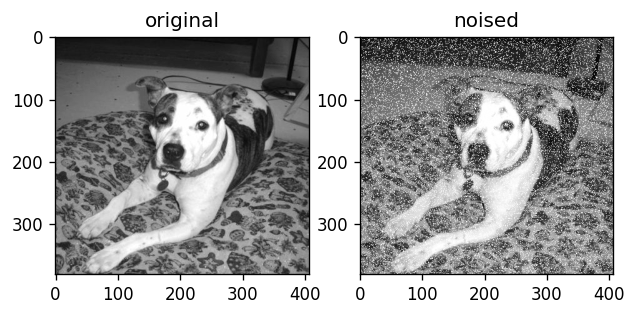

In [90]:
def noise_image(image, probability):
  threshold = 1-probability
  noised = np.ones(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      random_float = np.random.rand(1).item()
      if random_float < threshold:
        noised[i,j] = 0
      if random_float > threshold:
        noised[i,j] = 255
      else:
        noised[i,j] = image[i,j]
  fig, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(noised, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('noised')

noise_image(sample, 0.15)

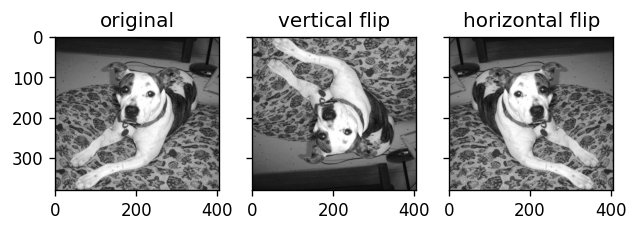

In [92]:
def flip_image(image):
  flipped_vertical = cv2.flip(image, 0)
  flipped_horizontal = cv2.flip(image, 1)
  fig, axes = plt.subplots(1,3, dpi=120, sharey=True)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(flipped_vertical, cmap='gray')
  axes[2].imshow(flipped_horizontal, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('vertical flip')
  axes[2].set_title('horizontal flip')

flip_image(sample)

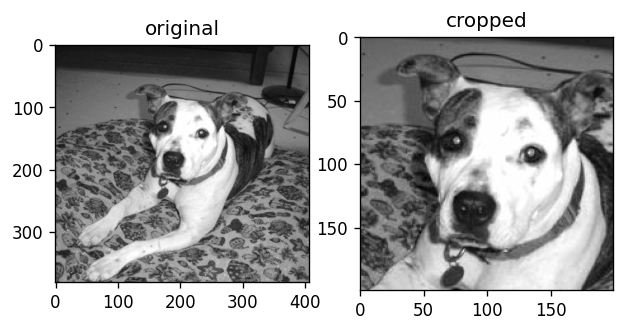

In [95]:
def crop_image(image):
  cropped = image[50:250,100:300]
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(cropped, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('cropped')

crop_image(sample)

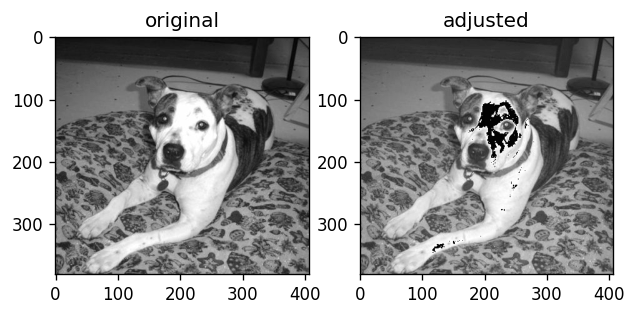

In [106]:
def adjust_contrast(image, amount):
  adjusted = image + amount
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[1].imshow(adjusted, cmap='gray')
  axes[0].set_title('original')
  axes[1].set_title('adjusted')

adjust_contrast(sample, 5)

100%|██████████| 381/381 [00:00<00:00, 486.39it/s]


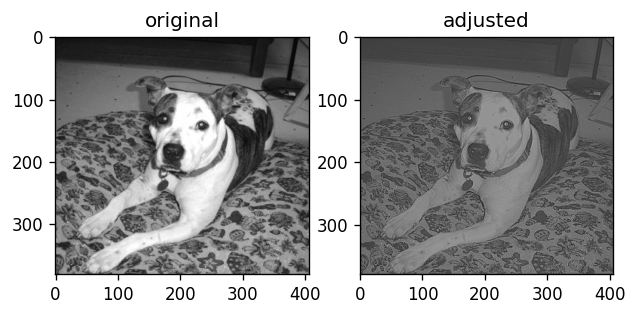

In [113]:
temp = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]])

def adjust_image(image, kernel_size=3, filter=temp):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  edges = []
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges.append((image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  num_pixels = len(edges)
  #  deriving factors of pixel count
  factors = []
  for number in range(400, 500):
    if num_pixels % number == 0:
      factors.append(number)
  #  converting to array and reshaping
  edges = np.array(edges).reshape((-1, max(factors)))
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('adjusted')

adjust_image(sample)

100%|██████████| 381/381 [00:00<00:00, 444.29it/s]


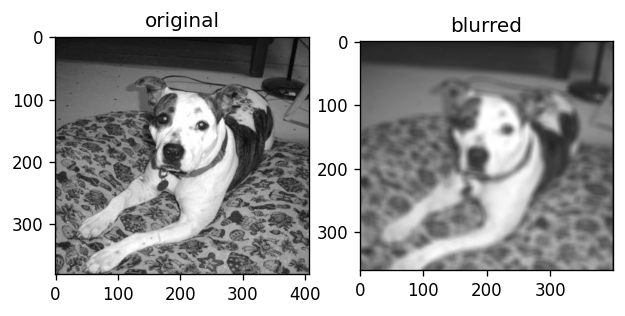

In [129]:
def blur_image(image, intensity=10):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  filter = 0.1*(np.ones((intensity,intensity)))
  #  creating an empty list to store convolutions
  edges = np.zeros(image.shape)
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges[i,j] = ((image[i:(i+intensity), j:(j+intensity)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  #num_pixels = len(edges)
  #  deriving factors of pixel count
  #factors = []
  #for number in range(400, 500):
    #if num_pixels % number == 0:
      #factors.append(number)
  #  converting to array and reshaping
  #edges = np.array(edges).reshape((-1, max(factors)))
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  edges = edges[:360, :400]
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('blurred')

blur_image(sample)

In [103]:
sample

array([[ 22,  22,  21, ...,  80,  79,  78],
       [ 31,  30,  29, ...,  83,  82,  81],
       [ 33,  32,  32, ...,  81,  81,  80],
       ...,
       [126, 113,  96, ..., 121, 126, 126],
       [147, 131, 109, ..., 133, 147, 153],
       [136, 115,  94, ..., 151, 156, 154]], dtype=uint8)

In [80]:
random_values_x = np.random.permutation(381)
random_values_y = np.random.permutation(381)

combined = zip(random_values_x, random_values_y)
for item in combined:
  print(item[0])
  break

27


In [61]:
ex1[:,:,0]

array([[ 20,  20,  19, ...,  32,  31,  30],
       [ 29,  28,  27, ...,  35,  34,  33],
       [ 31,  30,  30, ...,  33,  33,  32],
       ...,
       [103,  90,  77, ...,  78,  83,  83],
       [120, 106,  86, ...,  92, 106, 112],
       [106,  87,  69, ..., 114, 117, 115]], dtype=uint8)

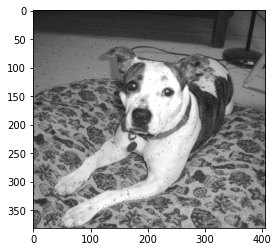

In [83]:
i=0

for xy in combined:
  ex1[xy[0], xy[1]] = 0
  i+=1
  if i == 350:
    ex1[xy[0], xy[1]] = 255
    i+=1
    if i == 350:
      break

plt.imshow(ex1, cmap='gray')

In [ ]:
kernel = 0.1*(np.ones((15,15)))
blur = []
for i in tqdm(range(sample.shape[0])):
  for j in range(sample.shape[1]):
    try:
      blur.append((sample[i:(i+15), j:(j+15)] * kernel).sum())
    except ValueError:
      pass

100%|██████████| 375/375 [00:01<00:00, 325.17it/s]


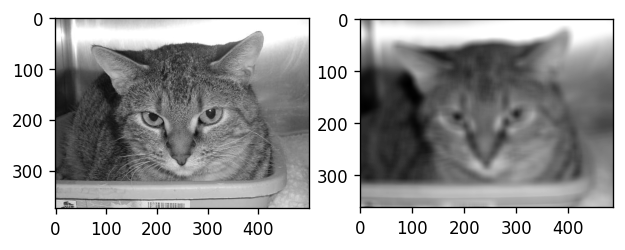

In [ ]:
blur = np.array(blur).reshape((-1, 487))
figure, axes = plt.subplots(1,2, dpi=120)
axes[0].imshow(sample, cmap='gray')
axes[1].imshow(blur, cmap='gray')

In [ ]:
eggs = []
for num in range(400, 501):
  if len(blur) % num == 0:
    eggs.append(num)

eggs

[487]

In [123]:
def blur_image(image, intensity=15):
  """This function performs convolution over an image
   with the aim of reducing pixel intensities thereby blurring said image"""
  #  creating a filter
  filter = 0.1*(np.ones((intensity,intensity)))
  #  creating an empty list to store convolutions
  blurred = []
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        blurred.append((image[i:(i+intensity), j:(j+intensity)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  num_pixels = len(blurred)
  #  deriving factors of pixel count
  factors = []
  for number in range(400, 500):
    if num_pixels % number == 0:
      factors.append(number)
  #  converting to array and reshaping
  blurred = np.array(blurred).reshape((-1, max(factors)))
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(blurred, cmap='gray')
  axes[1].set_title('blurred')

100%|██████████| 375/375 [00:01<00:00, 336.16it/s]


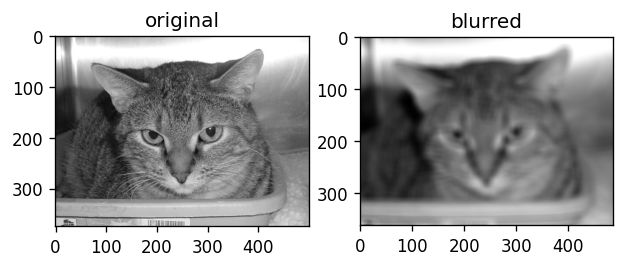

In [ ]:
blur_image(cat_imgs[0])

100%|██████████| 375/375 [00:01<00:00, 353.35it/s]


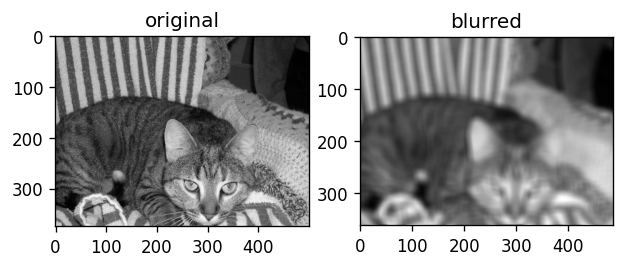

In [ ]:
blur_image(cat_imgs[15])

100%|██████████| 466/466 [00:01<00:00, 334.83it/s]


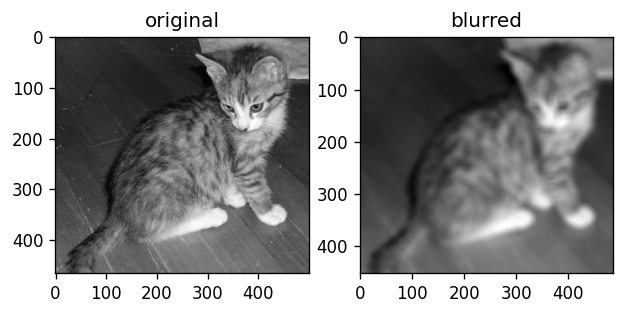

In [ ]:
blur_image(cat_imgs[5489])

In [ ]:
import torch.nn.functional as F
import torch

In [ ]:
temp

array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [ ]:
temp = np.ones((3,3))
temp[:,0] = -1
temp[:,1] = 0
temp

def detect_edges(image, kernel_size=3, filter=temp):
  """This function performs convolution over an image
   with the aim of identifying edges"""
  #  creating an empty list to store convolutions
  edges = []
  #  performing convolution
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      try:
        edges.append((image[i:(i+kernel_size), j:(j+kernel_size)] * filter).sum())
      except ValueError:
        pass
  #  determining the new number of pixels
  num_pixels = len(edges)
  #  deriving factors of pixel count
  factors = []
  for number in range(400, 500):
    if num_pixels % number == 0:
      factors.append(number)
  #  converting to array and reshaping
  edges = np.array(edges).reshape((-1, max(factors)))
  #  converting to tensor
  edges = torch.Tensor(edges)
  #  applying RELu activation
  edges = F.relu(edges)
  #  saving to memory
  np.save('conv_pixels.npy', edges)
  #  displaying results
  figure, axes = plt.subplots(1,2, dpi=120)
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('original')
  axes[1].imshow(edges, cmap='gray')
  axes[1].set_title('detected edges')

100%|██████████| 369/369 [00:00<00:00, 377.98it/s]


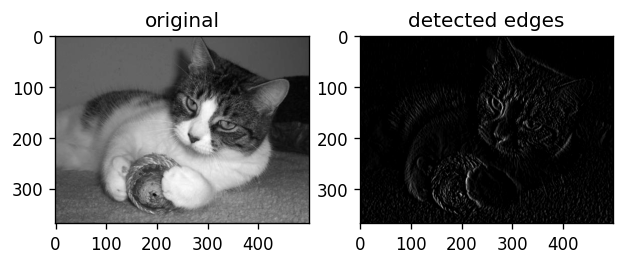

In [ ]:
detect_edges(sample)

100%|██████████| 375/375 [00:00<00:00, 381.31it/s]


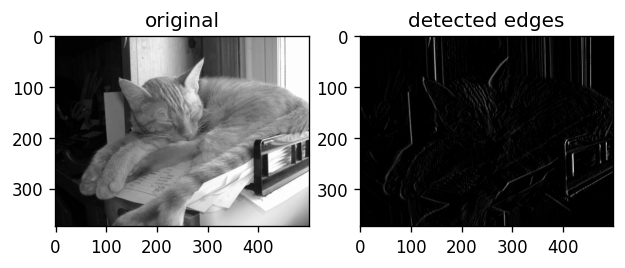

In [ ]:
detect_edges(cat_imgs[7561])

100%|██████████| 278/278 [00:00<00:00, 413.87it/s]


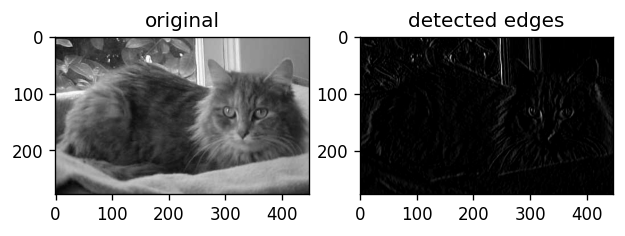

In [ ]:
detect_edges(cat_imgs[1047])